#Predicting Opioid Transactions in Ohio

## 1.Introduction

### 1.1 Background

Our dataset contains transaction information on hundreds of thousands of recorded opioid sales in the United States from 2006-2012. Our data comes from the DEA's ARCOS Dataset, which kept record of all opioid transactions to pharmacies in every state for these 6 years. Our dataset does not contain any data on individual buyers, but rather contains data about where the transaction occurred, when, what was sold, and how much was sold to each retailer. Combining this data from Arcos with Census data for Ohio counties, such as average age and average income, can give us an idea of what company targeted what area, or what demographic. We can use the data we have available to us to find key characteristics that pharmaceutical companies look for when deciding who to target for opioid sales.

### 1.2 Problem

Excessive prescription of opioid medication is the most direct cause of the opioid epidemic. By using the data available to us by ARCOS, we can find what companies contributed the most to creating this nationwide epidemic. We can deduce what companies sold the most in what county using the ARCOS dataset.

### 1.3 Interests

Since the opioid epidemic is such a widespread issue throughout the United States even today, this is information the public needs to see and understand. Anyone effected by the opioid epidemic should investigate the full extent of the dangerous excessive prescription by these companies in both Ohio cities and the United States as a whole. This data allows anyone to see what companies are most responsible for the opioid epidemic.

## 2. Data Cleaning and Acquisition

## 2.1 Data Sources

The data obtained for this project comes from the ARCOS dataset, provided by the Washington Post. This dataset contains transaction data on all opioid sales to pharmacies in the United States, but there is some data necessary to change and add before analyzing this data. For example, the date format of the dataset provided by The Washington Post was formatted in integer form. This was changed to datetime format instead. Using datetime format instead of integer format for date allows us to better sort data by different periods, including year or month transactions occurred. 

Data was also obtained from the United States census website. Data was gathered to find the population of each county in Ohio and per capita income in each county in Ohio.


## 2.2 Data Cleaning

The dataset also was missing some key information about the locations the transaction data was coming from. While the transaction data from ARCOS does include the county, city, and state the transactions originate from, ARCOS did not include any information about these locations. Data was taken from the United States Census website to fill in the gaps where information was lacking. From the Census website, per-capita county income was added to the dataset, as well as population by county. These values were added on to the existing database by using the population of each state county and the per-capita income of each county each year in the year ARCOS represents. We found the averages for these years in each county and used them to give more background about the situations these people and places are involved in that contribute to their high or low opioid transaction rate.

Using number of transactions or total quantity of pills sold to determine the gravity of pills sold in each area is also not an entirely accurate representation of volume of opioid transaction by population. Places with a low amount of opioid transactions that have a low population may be misrepresented as not being a significant area for opioid transactions. To solve this issue, total sales per capita was calculated by dividing total transactions by total population. Using sales per capita allows us to see if the amount of opioid transactions was high or low in a county regardless of the size of the population.

## 2.3 Feature Selection

There were many features included in the original ARCOS database that are not helpful in categorizing and exploring the transactions available to us. The dataset came with suggestions for interesting columns to use. All columns were removed except the columns specified by the suggestions for the dataset. The columns that were used by us include Buyer Name, Buyer Address, Buyer City, Buyer State, Buyer Zip, Buyer County, Drug Name, Quantity, Unit, Transaction Date, Base Weight In Grams, Product Name, Ingredient Name, Company Name, and Reporter Family.

The features that were kept and used by us in our exploration are Buyer State, Buyer County, Drug Name, Transaction Date, Base Weight in Grams, Product Name, and Company Name. Number of Transactions, County Population, County Per Capita Income, Transactions Per Capita, Pills Per Transaction, and Total Weight were calculated from the data given.

## Exploratory Data Analysis

## 3.1 Top Sales By Pharmaceutical Company

In [0]:
#@title
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#@title
test= pd.read_csv('drive/My Drive/arcos-oh-statewide-itemized.tsv.gz', sep='\t', error_bad_lines = False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,22,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#@title
simpleOhio = test[['BUYER_NAME','BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE', 'BUYER_ZIP', 'BUYER_COUNTY','DRUG_NAME', 'QUANTITY', 'UNIT', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM', 'DOSAGE_UNIT', 'Product_Name', 'Ingredient_Name','Revised_Company_Name', 'Reporter_family']]

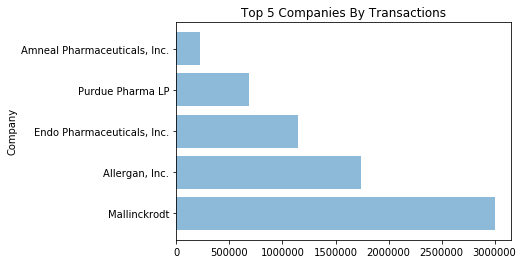

In [0]:
#@title
ohioCompanies = simpleOhio.groupby('Revised_Company_Name')
topOhioCompanies = ohioCompanies.size().sort_values(ascending = False)

countByCompany = simpleOhio.groupby('Revised_Company_Name').size().reset_index(name = 'counts')
companiesSorted = countByCompany.sort_values(by = ['counts'], ascending= False)
top5 = companiesSorted[:5]

objects = top5.Revised_Company_Name
y_pos = np.arange(len(objects))
values = top5.counts
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Company')
plt.title('Top 5 Companies By Transactions')

plt.show()

By grouping transaction data by company name, we can see what pharmaceutical companies are responsible for the most transactions in Ohio. There are 66 total companies that contribute to the roughly eight million total transactions in Ohio over these years. The majority of these transactions come from a small amount of companies. The top five corporations responsible for sale of these opioids represented by ARCOS are responsible for nearly seven million of the transactions out of the roughly eight million total. These companies, in order from most transactions to least, are Mallinckrodt, Allergan, Inc., Endo Pharmaceuticals, Purdue Pharma, and Amneal Pharmaceuticals. The opioid crisis, as we have discovered, was mostly contributed to by a few billion dollar corporations that sold millions of pills over short periods of time. These numbers represent sales through six years in Ohio, and these companies are responsible for millions of sales each year within those years.

## 3.2 Comparing Total Transactions and Total Pills Sold

By comparing total transactions in each county and total pills sold in each county, we can get a better sense of how large transactions are in each county. We can see if counties with a high amount of transactions generally have high amounts of transactions with small amounts of pills in each transaction, or if they generally have transactions that are higher in size but a low total transaction count overall. We can show these sort of comparisons by plotting total transactions per county by total pills sold. This allows us to easier see the size of transactions in each county. We can also plot how many pills per transaction each county has had over time in Ohio using the data in ARCOS.  

In [0]:
#@title
ohioCounty = simpleOhio.groupby('BUYER_COUNTY')
countyCounts = ohioCounty.count()

countyNames = simpleOhio.loc[:, 'BUYER_COUNTY'].unique()
countyDF = pd.DataFrame({'COUNTY_NAME': countyNames[:]})
countyDF = countyDF.sort_values(by=['COUNTY_NAME'])
countyDF = countyDF.reset_index(drop=True)
clustering = countyDF.drop(countyDF.index[88])
clustering = clustering.reset_index(drop=True)

countyCounts = countyCounts.reset_index()
transactionsPerCounty = countyCounts['BUYER_NAME']

clustering['numTransactions'] = transactionsPerCounty

sumByCounty = ohioCounty.sum()
sumByCounty = sumByCounty.reset_index()
quantityByCounty = sumByCounty['QUANTITY']
clustering['totalPills'] = quantityByCounty

censusData = pd.ExcelFile('drive/My Drive/co-est00int-01-39.xls')
censusData.sheet_names
df = censusData.parse('CO-EST00INT-01-39')
df.columns = df.loc[0]
df = df.drop(df.index[0])
df.reset_index(drop = True, inplace= True)
#Get average county population for timeframe of ARCOS
df.columns = ['County','gone','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
census = df.drop(['gone','2000','2001','2002','2003','2004','2005','2010','2011'], axis=1)
censusOhio = census.drop(census.index[0])
censusOhio.reset_index(drop = True, inplace = True)
countyPop = censusOhio.loc[:, "2006":"2009"]
censusOhio['countyPop'] = countyPop.mean(axis=1)
censusOhio = censusOhio.dropna()
censusOhio['countyPop'] = censusOhio['countyPop'].astype(int)

clustering['PopByCounty'] = censusOhio.countyPop

In [0]:
#@title
countyIncome = pd.read_excel('drive/My Drive/PerCapitaOhioCountyIncome.xlsx', sheet_name = 'Sheet1')
clustering['perCapIncome'] = countyIncome['header']

In [0]:
#@title
clustering['transactionsPerCapita'] = clustering['numTransactions'] / clustering['PopByCounty']

,COUNTY_NAME,numTransactions,totalPills,PopByCounty,perCapIncome,transactionsPerCapita
0,ADAMS,27230,58228.0,28584,17693,0.952631
1,ALLEN,54871,123304.0,106681,21713,0.514347
2,ASHLAND,17319,42923.0,53394,20558,0.324362
3,ASHTABULA,74469,199096.0,101976,19898,0.730260
4,ATHENS,42828,114237.0,64375,16642,0.665289


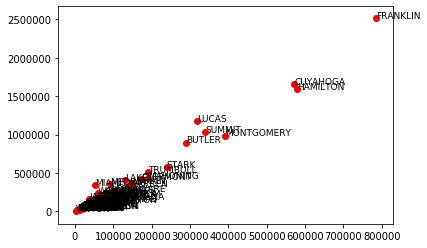

In [0]:
#@title
import matplotlib.pyplot as plt
types = clustering['COUNTY_NAME']

# simulating a pandas df['type'] column

x_coords = clustering['numTransactions']
y_coords = clustering['totalPills']

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
plt.show()

In [0]:
#@title
clustering['pillsPerTransaction'] = clustering['totalPills'] / clustering['numTransactions']

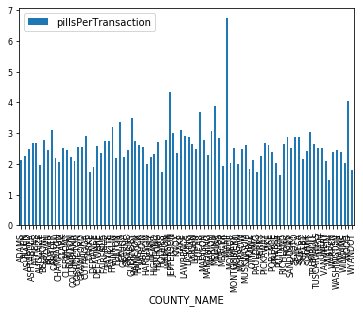

In [0]:
#@title
pillsPerTransBar = clustering.plot.bar(x='COUNTY_NAME', y='pillsPerTransaction', rot='vertical', fontsize = 8)

The graph above shows the average amount of pills in each transaction for each county in Ohio. The values show average quantity for each county in alphabetical order. You can see from this graph that the average amount of pills sold is roughly 3 in Ohio. This is not the most accurate method to use to calculate true volume of transactions in each county. Counties with a greater volume of medication sold can be better determined by using weight of the pills in grams.

We can also use this data to compare if there is a correlation between the top counties when sorting by total transactions and sorting by pills per transaction. We can see if the counties with the most sales are also the counties with the largest sales. Pills per transaction is one way to measure the overall volume of pills by location, but by calculating volume of pills by weight for each transaction, we can get a true sense of just how much medication has been sold in each place. 

In [0]:
#@title
byPPT = clustering.sort_values(by=['pillsPerTransaction'], ascending = False)
top5PPT = byPPT[:5]

countySums = ohioCounty.sum()
countyWeights = countySums['CALC_BASE_WT_IN_GM']

countyWeights.index = clustering.index

clustering['totalWeight'] = countyWeights


## 3.3 Determining Transaction Size by Total Weight

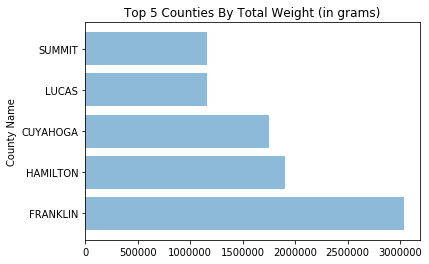

In [0]:
#@title
byTotalWeight = clustering.sort_values(by=['totalWeight'], ascending = False)
top5ByTotalWeight = byTotalWeight[:5]
top5TWRounded = top5ByTotalWeight.round(0)
objects = top5TWRounded.COUNTY_NAME
y_pos = np.arange(len(objects))
values = top5TWRounded.totalWeight
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('County Name')
plt.title('Top 5 Counties By Total Weight (in grams)')

plt.show()

Using total weight is another way we can determine transaction size. Total weight takes into account the weight of all pills sold combined, represented in total grams. The top counties represented in the graph above are those that have had the greatest total volume of pills sold there. These five counties are some of the most effected by the opioid epidemic in Ohio. This is another way we can determine what counties have been hurt the most by overprescription of opioid medication, but it may not accurately represent how much smaller counties have been effected. Calculating transactions per capita is one way to determine what smaller counties have have the most transactions when taking into account county population.

## 3.4 Determining Drug Type Sold

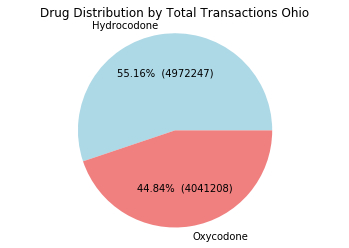

In [0]:
#@title
drugDist = simpleOhio.groupby('DRUG_NAME')
hydro = drugDist.count()['BUYER_NAME'][0]
oxy = drugDist.count()['BUYER_NAME'][1]

#Charts for total drug distribution Ohio
labels = 'Hydrocodone','Oxycodone'
sizes = hydro, oxy
colors = ['lightblue', 'lightcoral']



def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
plt.pie(sizes, labels = labels, colors = colors, autopct=make_autopct(values))
plt.axis('equal')
plt.title("Drug Distribution by Total Transactions Ohio")
plt.show()

Above is another basic visualization created using the library Matplotlib showing the distribution of total transactions including each drug type in Ohio over all years the ARCOS database covers. This can be taken further by showing the total weight of each drug sold in each county. We can get a better understanding of just how many opioids have been purchased in each county by calculating how much of each medication is included in all transactions in a state or county, both by number of transactions and by total weight.

We can see that hydrocodone is the more prominent drug distributed in these transactions in Ohio. Hydrocodone is a medication used to treat severe pain of prolonged duration. This drug is often misused and contributes to the opioid crisis. Oxycodone is the other drug represented in this dataset, and is a drug with high risk for addiction and dependence. This information was not given by pharmaceutical companies when the prescription of this drug was pushed for by these companies. We can see that oxycodone is less prominent than hydrocodone, but still accounts for nearly half of the transactions in the data. Taking oxycodone can cause respiratory distress and death, especially in high doses or when combined with other substances, especially alcohol. These opioids are highly dangerous, and such high volumes of them being sold during these years contributed to many Ohioans becoming addicting and many also overdosing and dying. There were 4,293 deaths reported in 2017 in Ohio, the second highest of any state. Millions of prescriptions including drugs with hydrocodone or oxycodone were a cause for these addicted individuals and numerous deaths.


##  3.5 Using Transactions Per Capita To Determine Transaction Size

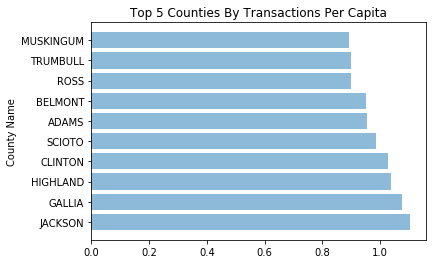

In [0]:
#@title
#plot by Transactions Per Capita
byTPC = clustering.sort_values(by=['transactionsPerCapita'], ascending = False)
top10ByTPC = byTPC[:10]

objects = top10ByTPC.COUNTY_NAME
y_pos = np.arange(len(objects))
values = top10ByTPC.transactionsPerCapita
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('County Name')
plt.title('Top 5 Counties By Transactions Per Capita')

plt.show()

Transactions per capita can be used to determine transaction size as well. This method of displaying volume of drug sales takes into consideration the size of a county when determining the volume of sales in comparison to other counties. Ten counties were displayed in the graph above, since no counties high on this list appeared in previous measurements of transaction volume. Counties with greater than 1.0 transactions per capita have more sales in the county than there are people. These counties are those that are greatly effected by the opioid epidemic, but have a small population.

## 3.6 Using Total Transactions to Determine Transaction Size

In [0]:
#@title
# Fips code for each county -- used in plotly
FIPS = ['39001','39003', '39005', '39007', '39009', '39011', '39013', '39015','39017', '39019', '39021', '39023', '39025', '39027', '39029', '39031', '39033', '39035', '39037', '39039', '39041', \
        '39043', '39045', '39047', '39049', '39051', '39053', '39055', '39057', '39059', '39061', '39063', '39065', '39067', '39069', '39071', '39073', '39075', '39077', '39079', '39081',\
        '39083', '39085', '39087', '39089', '39091', '39093', '39095', '39097', '39099', '39101', '39103', '39105', '39107', '39109', '39111', '39113', '39115', '39117', '39119', '39121',\
        '39123', '39125', '39127', '39129', '39131', '39133', '39135', '39137', '39139', '39141', '39143', '39145', '39147', '39149', '39151', '39153', '39155', '39157', '39159', '39161', \
        '39163', '39165', '39167', '39169', '39171', '39173', '39175']


#plotly heat map -- transactions by county
import plotly.figure_factory as ff
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install plotly==4.1.0

countByCounty = simpleOhio.groupby('BUYER_COUNTY').size().reset_index(name = 'counts')
countByCounty

values = countByCounty['counts'].tolist()
fig = ff.create_choropleth(fips=FIPS, values=values, scope = ['OH'], legend_title = 'Number of Transactions', title = 'Total Opioid Transactions in Ohio', county_outline={'color': 'rgb(255,255,255)', 'width': 0.5})
fig.layout.template = None

fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
#@title
countByCounty = simpleOhio.groupby('BUYER_COUNTY').size().reset_index(name = 'counts')
top5ByTransaction = countByCounty.sort_values(by = 'counts', ascending = False)
top5ByTransaction[:5]

,BUYER_COUNTY,counts
24,FRANKLIN,784051
30,HAMILTON,578019
17,CUYAHOGA,572388
56,MONTGOMERY,391859
76,SUMMIT,339740


By using overall number of transactions to determine volume of pills sold, we can see what counties had the most total transactions during the time represented in the ARCOS dataset. From this heatmap above and the coinciding list, showing the top 5 Ohio counties when transactions are used to determine volume of pill sales, we concluded that this list is a fairly accurate representation of which counties are most effected by the opioid epidemic. The top 5 counties in this list is almost identical to the one produced when using weight as a metric to determine volume of medication sales, with the exception of Summit county being included in the top 5 of total transactions, while Lucas is included in total weight. These are a more accurate representation of larger counties again, as counties with small population fall lower on this list.

## 3.7 Comparing Total Transactions, Pills Per Transaction, Transactions Per Capita, and Total Weight

Using total transactions and total weight of all sales in counties are good metrics to use to determine which large counties are most effected by the opioid epidemic. These metrics determine which counties have the most overall volume of medication sold. Counties with larger population have larger amounts of pills sold, as determined by the plot depicting pills per transaction. It is therefore more effective to use total transactions and total weight to determine which larger states have been most effected, since they are similar in population size. By using transactions per capita to determine volume of sales, we can see what smaller counties have been most effected by the opioid epidemic during the years represented in ARCOS. Calculating how many transactions occur for every person living in a county is a better representation of how much counties with a small population have been sold to. Counties with small populations have been effected just as greatly as large counties, and some counties in Ohio have more transactions than citizens living in the county. Using all four of these metrics is necessary to determine how great the volume of medication sold truly is in each place. Without using more than one of these methods, smaller counties or larger counties would appear to be effected less than they actually are.

## 4. Predictive Modeling

## 5. Conclusions